# Some Functions 

### R^2 coefficient function

In [1]:
#--------------------------------R^2 coefficient for variance------------
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

### Split 

In [2]:
def split1(X, y, mvalid, mtest): # full dataset
    
    # split
    X1, Xtest, y1, ytest = train_test_split(X,y, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

In [3]:
def split2(Xn, yn, mvalid, mtest): # for noise + full dataset
    
    import random
    
    # split
    X1, Xtest, y1, ytest = train_test_split(Xn,yn, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

In [4]:
def split3(Xn, yn, m, mvalid, mtest): # noise + reduced dataset
    
    import random
    
    # dataset
    n = random.sample(range(1, Xn.shape[0]), m)
    Xn = Xn[n,:] # Xn should be defined
    yn = yn[n]   # yn should be defined
    
    # split
    X1, Xtest, y1, ytest = train_test_split(Xn,yn, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

### Model Architecture

In [5]:
def CNN1D(n_timesteps, n_features, n1, d1, n2, d2):
    
    # define model architecture : LSTM for regression
    model = Sequential()
    
    # Conv layers
    model.add(Conv1D(filters=16, kernel_size=3, input_shape=(n_timesteps,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    
    # Dense Layers
    model.add(Dense(n1, activation='relu'))
    model.add(Dropout(d1))
    model.add(Dense(n2, activation='relu'))
    model.add(Dropout(d2))
    #model.add(Dense(16, activation='relu'))
    
    # Output Layer
    model.add(Dense(2, activation='linear'))
    
    return model

### Training 

In [6]:
def train(Xtrain, ytrain, Xvalid, yvalid, model, alpha, nepoch, batchsize):
    
    # otherparameters
    m_train = Xtrain.shape[0]
    m_valid = Xvalid.shape[0]
    
    # reshape the array
    Xtrain = np.reshape(Xtrain, (m_train,n_timesteps,n_features)) # n_timesteps and n_feature = defined
    Xvalid = np.reshape(Xvalid, (m_valid,n_timesteps,n_features))
    
    model.compile(loss='mse', optimizer=Adam(lr=alpha,beta_1=0.9,beta_2=0.999), metrics=['mape','mae',r_square])
    
    # train the model
    
    history = model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=nepoch, batch_size = batchsize, verbose=2, shuffle = True)
    
    return [model, history];

### Plots

In [7]:
def mseplot(history, lb, ub, font, ep1, ep2):
    plt.figure(figsize=(14,8))
    plt.plot(history.history['loss'],'-o')
    plt.plot(history.history['val_loss'],'-s')
    plt.title('MSE loss for Damage localization (1DCNN)',fontsize=font+2)
    plt.ylabel('MSE',fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs',fontsize=font)
    plt.legend(['train', 'test'], loc='upper right',fontsize=font)
    plt.axis([ep1,ep2,lb,ub])
    return plt.show()

def maeplot(history, lb, ub, font, ep1, ep2):
    plt.figure(figsize=(14,8))
    plt.plot(history.history['mae'],'-o')
    plt.plot(history.history['val_mae'],'-s')
    plt.title('MAE for Damage localization (1DCNN)',fontsize=font+2)
    plt.ylabel('MAE',fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs',fontsize=font)
    plt.legend(['train', 'test'], loc='upper right',fontsize=font)
    plt.axis([ep1,ep2,lb,ub])
    return plt.show()

def mapeplot(history, lb, ub, font, ep1, ep2):
    plt.figure(figsize=(14,8))
    plt.plot(history.history['mape'],'-o')
    plt.plot(history.history['val_mape'],'-s')
    plt.title('MAPE for Damage localization (1DCNN)',fontsize=font+2)
    plt.ylabel('MAPE',fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs',fontsize=font)
    plt.legend(['train', 'test'], loc='upper right',fontsize=font)
    plt.axis([ep1,ep2,lb,ub])
    return plt.show()

def r2plot(history, lb, ub, font, ep1, ep2):
    plt.figure(figsize=(14,8))
    plt.plot(history.history['r_square'],'-o')
    plt.plot(history.history['val_r_square'],'-s')
    plt.title('R^2 for Damage localization (1DCNN)',fontsize=font+2)
    plt.ylabel('R^2',fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs',fontsize=font)
    plt.legend(['train', 'test'], loc='upper right',fontsize=font)
    plt.axis([ep1,ep2,lb,ub])
    return plt.show()

### Prediction 

In [8]:
def pred(model,Xtest,ytest,name):
    
    m_test = Xtest.shape[0]
    Xtest = np.reshape(Xtest,(m_test,n_timesteps,n_features))
    y_predicted = model.predict(Xtest, verbose=2)
    y_predicted = np.array(y_predicted)
    y_actual = ytest
    
    diff = y_predicted - y_actual
    percentDiff = (diff / y_actual) * 100
    absPercentDiff = np.abs(percentDiff)
    APD = pd.DataFrame(absPercentDiff)
    APD = round(APD,2)
    
    import xlsxwriter
    
    y_actual = np.array(y_actual)
    APD = np.array(APD)
  
    workbook = xlsxwriter.Workbook(name) 
  
    # By default worksheet names in the spreadsheet will be  
    # Sheet1, Sheet2 etc., but we can also specify a name. 
    worksheet = workbook.add_worksheet("My sheet") 

    worksheet.write(0, 0, 'True values (x)') 
    worksheet.write(0, 1, 'True values (a)')
    worksheet.write(0, 2, 'Predicted values (x)') 
    worksheet.write(0, 3, 'Predicted values (a)')
    worksheet.write(0, 4, 'APD (x)') 
    worksheet.write(0, 5, 'APD (a)') 

    # columns are indexed from 1. 
    row = 1
    col = 0

    # Iterate over the data and write it out row by row. 
    for i in range(0, len(y_actual)):
        worksheet.write(row, col, y_actual[i,0])
        worksheet.write(row, col + 1, y_actual[i,1]) 
        worksheet.write(row, col + 2, y_predicted[i,0])
        worksheet.write(row, col + 3, y_predicted[i,1])
        worksheet.write(row, col + 4, APD[i,0]) 
        worksheet.write(row, col + 5, APD[i,1]) 
        row += 1
  
    workbook.close()

    excel = pd.read_excel(name)
    
    return excel

In [9]:
#import os, signal
#os.kill(os.getpid(), signal.SIGTERM)

## Importing APIs

In [10]:
#------------------------------------------imports----------------------------
%matplotlib inline
import random 
import tensorflow as tf

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Activation, MaxPooling1D, Dropout, Lambda 
from tensorflow.keras.layers import Dense, Conv1D, SimpleRNN, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

Using TensorFlow backend.


In [11]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Callbacks

In [12]:
#-----------------------------------------callbacks---------------------------
# 1. Epoch Schedule
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_mean_absolute_error')<1.25) and (logs.get('mean_absolute_error')<1.25) and (logs.get('val_loss')<3) and (logs.get('loss')<3) and (abs(logs.get('val_loss') - logs.get('loss')) < 0.5):
      print("\nReached perfect accuracy so cancelling training!")
      self.model.stop_training = True

epoch_schedule = myCallback()

# 2. Saving weight checkpoint

filepath = "gdrive/My Drive/save_weights/epochs:{epoch:03d}-loss:{loss:.3f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min',period=100)

# 3. Learning Rate Schedule      
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 2.5))

## Importing data

In [13]:
df_D_Ax = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/0_DataSet/Ax2500_D_03Aug20.txt',header=None)
df_D_Flex = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/0_DataSet/Flex2500_D_03Aug20.txt',header=None)
y = pd.read_excel('D:/SDE/1_SDEisotropicDL/CollectData/2_Labels/labelsD.xlsx',header=None)

In [14]:
print(df_D_Ax.shape)
print(df_D_Flex.shape)
print(y.shape)

(2500, 8192)
(2500, 8192)
(2500, 2)


## Plots 

In [15]:
nfft = 1024*8
T = 0.5e-6*nfft
q = 100e3
deltaT = T/nfft
t = np.arange(0,(nfft-1)/nfft,1/nfft)
time = t*T
print(time)

[0.0000e+00 5.0000e-07 1.0000e-06 ... 4.0940e-03 4.0945e-03 4.0950e-03]


1253


Text(0, 0.5, 'Amplitude')

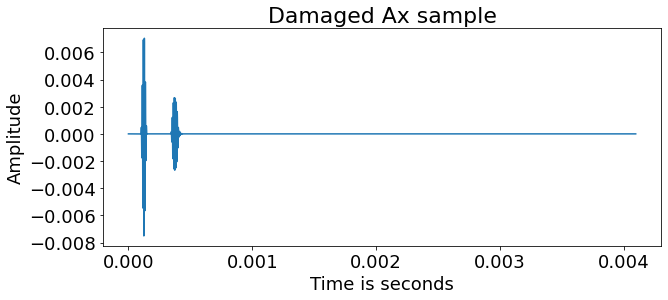

In [16]:
N = random.randint(1, 2500)
plt.figure(figsize=(10,4))
plt.plot(time, df_D_Ax.iloc[N, 0 : df_D_Ax.shape[1]-1])
plt.title('Damaged Ax sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

1253


Text(0, 0.5, 'Amplitude')

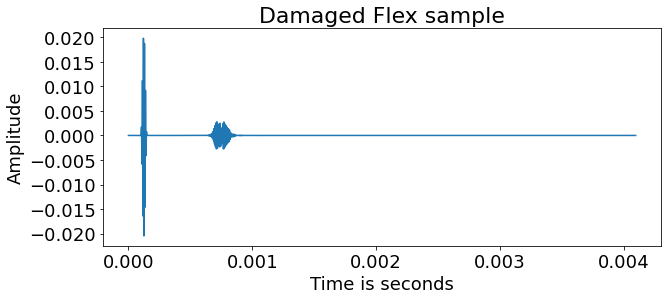

In [17]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D_Flex.iloc[N, 0 : df_D_Flex.shape[1]-1])
plt.title('Damaged Flex sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

In [18]:
df_D = df_D_Ax + df_D_Flex

1253


Text(0, 0.5, 'Amplitude')

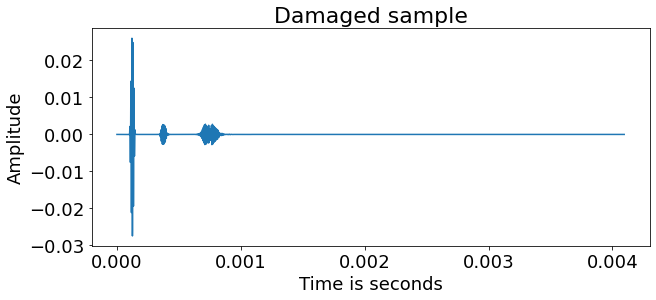

In [19]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D.iloc[N, 0 : df_D.shape[1]-1])
plt.title('Damaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

## Deciding Features and Labels

In [20]:
index = np.where(time == 1e-03)
index = int(index[0])
print(index)

2000


In [21]:
DAx = df_D_Ax.iloc[:, 0 : index]
DFlex = df_D_Flex.iloc[:, 0 : index]
X = DAx + DFlex
# X = np.concatenate([DAx,DFlex], axis=1)
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(2500, 2000)
(2500, 2)


In [22]:
n_timesteps = index
n_features = 1
n_outputs = 2

# Dataset with Noise 

## Noise 

In [23]:
#---Random gaussian noise parameter
beta1 = 0.01
beta2 = 0.02
beta3 = 0.03
mu = 0
sigma = 1
r = sigma*np.random.randn(2000,1) + mu   #random parameter with gaussian distribution
r = np.transpose(r)

#---Noisy signal
n1 = beta1*r*np.max(X)
n2 = beta2*r*np.max(X)
n3 = beta3*r*np.max(X)
Xn1 = X + n1
Xn2 = X + n2
Xn3 = X + n3

#---Signal to noise ratio
import math

rms_Xn = np.sqrt(np.mean(Xn3**2))
Power_Xn = rms_Xn**2

rms_n = np.sqrt(np.mean(n3**2))
Power_n = rms_n**2

SNR_dB = 10*math.log10(Power_Xn/Power_n)
print("SNR : ",SNR_dB)

SNR :  11.314583032222405


## Plots 

61


Text(0.5, 1.0, 'Dam')

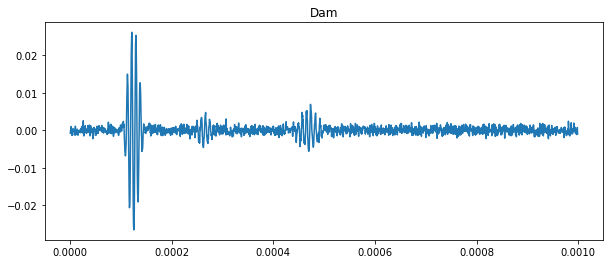

In [24]:
#---Plot non-noisy signal
D = random.randint(1, 2500)
print(D)

plt.figure(figsize=(10,4))
plt.plot(time[0:index-1], Xn3[D, 0 : index-1])
plt.title('Dam')

## New Dataset with Noise

In [25]:
Xn = np.concatenate([X,Xn1,Xn2,Xn3], axis=0)
yn = np.concatenate([y,y,y,y], axis=0)
print(Xn.shape)
print(yn.shape)

(10000, 2000)
(10000, 2)


# m = 10000 

In [26]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split2(Xn, yn, 0.1, 0.05)
print(Xtrain.shape)
print(Xvalid.shape)
print(Xtest.shape)
print(ytrain.shape)
print(yvalid.shape)
print(ytest.shape)

(8550, 2000)
(950, 2000)
(500, 2000)
(8550, 2)
(950, 2)
(500, 2)


In [27]:
# call model architecture
model = CNN1D(2000, 1, 512, 0.25, 128, 0.2)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 999, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 498, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 248, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 246, 128)          2

In [28]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-5, 500, 32)

Train on 8550 samples, validate on 950 samples
Epoch 1/500
8550/8550 - 4s - loss: 0.0547 - mape: 95.5472 - mae: 0.1534 - r_square: 0.2013 - val_loss: 0.0244 - val_mape: 83.0556 - val_mae: 0.1072 - val_r_square: 0.6465
Epoch 2/500
8550/8550 - 2s - loss: 0.0266 - mape: 99.6120 - mae: 0.1155 - r_square: 0.6112 - val_loss: 0.0244 - val_mape: 82.6221 - val_mae: 0.1070 - val_r_square: 0.6466
Epoch 3/500
8550/8550 - 2s - loss: 0.0266 - mape: 98.7794 - mae: 0.1152 - r_square: 0.6127 - val_loss: 0.0244 - val_mape: 79.7838 - val_mae: 0.1070 - val_r_square: 0.6482
Epoch 4/500
8550/8550 - 2s - loss: 0.0264 - mape: 97.4414 - mae: 0.1147 - r_square: 0.6136 - val_loss: 0.0242 - val_mape: 78.3884 - val_mae: 0.1065 - val_r_square: 0.6509
Epoch 5/500
8550/8550 - 2s - loss: 0.0260 - mape: 95.1301 - mae: 0.1134 - r_square: 0.6213 - val_loss: 0.0240 - val_mape: 77.8470 - val_mae: 0.1060 - val_r_square: 0.6537
Epoch 6/500
8550/8550 - 2s - loss: 0.0255 - mape: 94.7319 - mae: 0.1120 - r_square: 0.6284 - val_l

Epoch 49/500
8550/8550 - 2s - loss: 0.0025 - mape: 55.6464 - mae: 0.0346 - r_square: 0.9627 - val_loss: 0.0012 - val_mape: 39.0386 - val_mae: 0.0205 - val_r_square: 0.9834
Epoch 50/500
8550/8550 - 2s - loss: 0.0024 - mape: 54.7658 - mae: 0.0342 - r_square: 0.9646 - val_loss: 0.0011 - val_mape: 39.8447 - val_mae: 0.0198 - val_r_square: 0.9842
Epoch 51/500
8550/8550 - 2s - loss: 0.0024 - mape: 54.8325 - mae: 0.0337 - r_square: 0.9651 - val_loss: 0.0012 - val_mape: 36.5024 - val_mae: 0.0211 - val_r_square: 0.9836
Epoch 52/500
8550/8550 - 2s - loss: 0.0023 - mape: 54.7345 - mae: 0.0333 - r_square: 0.9663 - val_loss: 0.0011 - val_mape: 37.5980 - val_mae: 0.0211 - val_r_square: 0.9837
Epoch 53/500
8550/8550 - 2s - loss: 0.0023 - mape: 54.6236 - mae: 0.0329 - r_square: 0.9670 - val_loss: 0.0011 - val_mape: 38.8822 - val_mae: 0.0203 - val_r_square: 0.9845
Epoch 54/500
8550/8550 - 2s - loss: 0.0023 - mape: 53.9349 - mae: 0.0327 - r_square: 0.9666 - val_loss: 0.0010 - val_mape: 38.1289 - val_mae

Epoch 96/500
8550/8550 - 2s - loss: 0.0015 - mape: 45.1165 - mae: 0.0260 - r_square: 0.9788 - val_loss: 6.2618e-04 - val_mape: 33.8197 - val_mae: 0.0148 - val_r_square: 0.9911
Epoch 97/500
8550/8550 - 2s - loss: 0.0014 - mape: 44.9867 - mae: 0.0255 - r_square: 0.9793 - val_loss: 6.3830e-04 - val_mape: 33.1960 - val_mae: 0.0153 - val_r_square: 0.9909
Epoch 98/500
8550/8550 - 2s - loss: 0.0015 - mape: 44.7388 - mae: 0.0257 - r_square: 0.9788 - val_loss: 6.0212e-04 - val_mape: 33.5873 - val_mae: 0.0140 - val_r_square: 0.9914
Epoch 99/500
8550/8550 - 2s - loss: 0.0014 - mape: 45.4154 - mae: 0.0257 - r_square: 0.9788 - val_loss: 6.0304e-04 - val_mape: 33.1342 - val_mae: 0.0143 - val_r_square: 0.9914
Epoch 100/500
8550/8550 - 2s - loss: 0.0014 - mape: 44.7661 - mae: 0.0253 - r_square: 0.9798 - val_loss: 5.8948e-04 - val_mape: 34.0635 - val_mae: 0.0140 - val_r_square: 0.9916
Epoch 101/500
8550/8550 - 2s - loss: 0.0014 - mape: 44.4076 - mae: 0.0253 - r_square: 0.9798 - val_loss: 6.4227e-04 - v

Epoch 143/500
8550/8550 - 2s - loss: 0.0010 - mape: 40.5840 - mae: 0.0220 - r_square: 0.9848 - val_loss: 3.8837e-04 - val_mape: 29.5119 - val_mae: 0.0116 - val_r_square: 0.9944
Epoch 144/500
8550/8550 - 2s - loss: 0.0010 - mape: 40.4019 - mae: 0.0221 - r_square: 0.9849 - val_loss: 3.7329e-04 - val_mape: 29.1899 - val_mae: 0.0114 - val_r_square: 0.9946
Epoch 145/500
8550/8550 - 2s - loss: 0.0010 - mape: 40.3376 - mae: 0.0221 - r_square: 0.9849 - val_loss: 3.8280e-04 - val_mape: 29.3053 - val_mae: 0.0117 - val_r_square: 0.9945
Epoch 146/500
8550/8550 - 2s - loss: 0.0010 - mape: 40.1848 - mae: 0.0219 - r_square: 0.9849 - val_loss: 3.7505e-04 - val_mape: 28.9522 - val_mae: 0.0115 - val_r_square: 0.9946
Epoch 147/500
8550/8550 - 2s - loss: 9.8990e-04 - mape: 39.8998 - mae: 0.0216 - r_square: 0.9856 - val_loss: 3.7154e-04 - val_mape: 29.0605 - val_mae: 0.0115 - val_r_square: 0.9946
Epoch 148/500
8550/8550 - 2s - loss: 9.9926e-04 - mape: 39.2834 - mae: 0.0218 - r_square: 0.9855 - val_loss: 3.

Epoch 189/500
8550/8550 - 2s - loss: 8.1443e-04 - mape: 35.6207 - mae: 0.0195 - r_square: 0.9881 - val_loss: 2.5954e-04 - val_mape: 26.7642 - val_mae: 0.0100 - val_r_square: 0.9962
Epoch 190/500
8550/8550 - 2s - loss: 7.9161e-04 - mape: 35.9712 - mae: 0.0194 - r_square: 0.9885 - val_loss: 2.7883e-04 - val_mape: 27.8704 - val_mae: 0.0104 - val_r_square: 0.9960
Epoch 191/500
8550/8550 - 2s - loss: 7.7663e-04 - mape: 36.1904 - mae: 0.0193 - r_square: 0.9887 - val_loss: 2.5844e-04 - val_mape: 26.1406 - val_mae: 0.0097 - val_r_square: 0.9963
Epoch 192/500
8550/8550 - 2s - loss: 7.8394e-04 - mape: 36.1005 - mae: 0.0194 - r_square: 0.9887 - val_loss: 2.6709e-04 - val_mape: 27.5060 - val_mae: 0.0102 - val_r_square: 0.9962
Epoch 193/500
8550/8550 - 2s - loss: 7.9568e-04 - mape: 35.9122 - mae: 0.0194 - r_square: 0.9884 - val_loss: 2.8386e-04 - val_mape: 25.7614 - val_mae: 0.0109 - val_r_square: 0.9959
Epoch 194/500
8550/8550 - 2s - loss: 7.6666e-04 - mape: 35.4960 - mae: 0.0192 - r_square: 0.988

Epoch 235/500
8550/8550 - 2s - loss: 6.6723e-04 - mape: 33.2174 - mae: 0.0179 - r_square: 0.9903 - val_loss: 2.0588e-04 - val_mape: 23.8556 - val_mae: 0.0091 - val_r_square: 0.9970
Epoch 236/500
8550/8550 - 2s - loss: 6.3982e-04 - mape: 33.0515 - mae: 0.0176 - r_square: 0.9908 - val_loss: 1.8979e-04 - val_mape: 24.7627 - val_mae: 0.0084 - val_r_square: 0.9973
Epoch 237/500
8550/8550 - 2s - loss: 6.2681e-04 - mape: 33.1352 - mae: 0.0174 - r_square: 0.9906 - val_loss: 2.1969e-04 - val_mape: 23.4519 - val_mae: 0.0097 - val_r_square: 0.9968
Epoch 238/500
8550/8550 - 2s - loss: 6.4749e-04 - mape: 32.2410 - mae: 0.0176 - r_square: 0.9906 - val_loss: 2.0169e-04 - val_mape: 26.7859 - val_mae: 0.0090 - val_r_square: 0.9971
Epoch 239/500
8550/8550 - 2s - loss: 6.3105e-04 - mape: 33.0693 - mae: 0.0174 - r_square: 0.9908 - val_loss: 2.1386e-04 - val_mape: 23.2539 - val_mae: 0.0091 - val_r_square: 0.9969
Epoch 240/500
8550/8550 - 2s - loss: 6.4300e-04 - mape: 32.4498 - mae: 0.0175 - r_square: 0.990

Epoch 281/500
8550/8550 - 2s - loss: 5.5949e-04 - mape: 30.1312 - mae: 0.0164 - r_square: 0.9919 - val_loss: 1.5627e-04 - val_mape: 22.1149 - val_mae: 0.0076 - val_r_square: 0.9977
Epoch 282/500
8550/8550 - 2s - loss: 5.5259e-04 - mape: 29.8905 - mae: 0.0162 - r_square: 0.9920 - val_loss: 1.5810e-04 - val_mape: 22.0981 - val_mae: 0.0076 - val_r_square: 0.9977
Epoch 283/500
8550/8550 - 2s - loss: 5.5707e-04 - mape: 30.1355 - mae: 0.0163 - r_square: 0.9919 - val_loss: 1.6847e-04 - val_mape: 22.3290 - val_mae: 0.0082 - val_r_square: 0.9976
Epoch 284/500
8550/8550 - 2s - loss: 5.4411e-04 - mape: 29.7651 - mae: 0.0161 - r_square: 0.9921 - val_loss: 1.9820e-04 - val_mape: 21.9855 - val_mae: 0.0093 - val_r_square: 0.9971
Epoch 285/500
8550/8550 - 2s - loss: 5.5464e-04 - mape: 29.7798 - mae: 0.0162 - r_square: 0.9920 - val_loss: 1.7123e-04 - val_mape: 21.7504 - val_mae: 0.0084 - val_r_square: 0.9975
Epoch 286/500
8550/8550 - 2s - loss: 5.3930e-04 - mape: 29.4753 - mae: 0.0161 - r_square: 0.992

Epoch 327/500
8550/8550 - 2s - loss: 4.9668e-04 - mape: 26.6559 - mae: 0.0152 - r_square: 0.9928 - val_loss: 1.4399e-04 - val_mape: 19.1420 - val_mae: 0.0078 - val_r_square: 0.9979
Epoch 328/500
8550/8550 - 2s - loss: 4.8149e-04 - mape: 26.7817 - mae: 0.0150 - r_square: 0.9930 - val_loss: 1.2807e-04 - val_mape: 18.2877 - val_mae: 0.0072 - val_r_square: 0.9981
Epoch 329/500
8550/8550 - 2s - loss: 4.6620e-04 - mape: 26.6763 - mae: 0.0149 - r_square: 0.9932 - val_loss: 1.3057e-04 - val_mape: 19.0103 - val_mae: 0.0070 - val_r_square: 0.9981
Epoch 330/500
8550/8550 - 2s - loss: 4.8368e-04 - mape: 26.5676 - mae: 0.0151 - r_square: 0.9930 - val_loss: 1.2644e-04 - val_mape: 19.3939 - val_mae: 0.0071 - val_r_square: 0.9982
Epoch 331/500
8550/8550 - 2s - loss: 4.7396e-04 - mape: 26.0772 - mae: 0.0149 - r_square: 0.9931 - val_loss: 1.2029e-04 - val_mape: 18.2737 - val_mae: 0.0068 - val_r_square: 0.9983
Epoch 332/500
8550/8550 - 2s - loss: 4.7424e-04 - mape: 26.0506 - mae: 0.0149 - r_square: 0.993

Epoch 373/500
8550/8550 - 2s - loss: 4.2239e-04 - mape: 23.1377 - mae: 0.0140 - r_square: 0.9939 - val_loss: 9.7050e-05 - val_mape: 16.4190 - val_mae: 0.0063 - val_r_square: 0.9986
Epoch 374/500
8550/8550 - 2s - loss: 4.0964e-04 - mape: 23.4934 - mae: 0.0139 - r_square: 0.9941 - val_loss: 1.0166e-04 - val_mape: 16.0490 - val_mae: 0.0063 - val_r_square: 0.9985
Epoch 375/500
8550/8550 - 2s - loss: 4.2955e-04 - mape: 23.0080 - mae: 0.0141 - r_square: 0.9938 - val_loss: 1.1950e-04 - val_mape: 15.6759 - val_mae: 0.0075 - val_r_square: 0.9983
Epoch 376/500
8550/8550 - 2s - loss: 4.2309e-04 - mape: 23.5034 - mae: 0.0140 - r_square: 0.9939 - val_loss: 9.0603e-05 - val_mape: 16.4331 - val_mae: 0.0060 - val_r_square: 0.9987
Epoch 377/500
8550/8550 - 2s - loss: 4.1388e-04 - mape: 23.0402 - mae: 0.0139 - r_square: 0.9940 - val_loss: 1.0531e-04 - val_mape: 14.8136 - val_mae: 0.0064 - val_r_square: 0.9985
Epoch 378/500
8550/8550 - 2s - loss: 4.2858e-04 - mape: 23.1732 - mae: 0.0141 - r_square: 0.993

Epoch 419/500
8550/8550 - 2s - loss: 3.6982e-04 - mape: 20.9069 - mae: 0.0131 - r_square: 0.9947 - val_loss: 8.3754e-05 - val_mape: 14.7387 - val_mae: 0.0062 - val_r_square: 0.9988
Epoch 420/500
8550/8550 - 2s - loss: 3.7217e-04 - mape: 20.7994 - mae: 0.0131 - r_square: 0.9946 - val_loss: 7.9694e-05 - val_mape: 13.9624 - val_mae: 0.0059 - val_r_square: 0.9988
Epoch 421/500
8550/8550 - 2s - loss: 3.7525e-04 - mape: 20.3549 - mae: 0.0131 - r_square: 0.9946 - val_loss: 8.3941e-05 - val_mape: 13.5723 - val_mae: 0.0060 - val_r_square: 0.9988
Epoch 422/500
8550/8550 - 2s - loss: 3.5964e-04 - mape: 20.2773 - mae: 0.0129 - r_square: 0.9948 - val_loss: 7.3132e-05 - val_mape: 13.3487 - val_mae: 0.0054 - val_r_square: 0.9989
Epoch 423/500
8550/8550 - 2s - loss: 3.6130e-04 - mape: 19.9095 - mae: 0.0128 - r_square: 0.9948 - val_loss: 7.4813e-05 - val_mape: 14.1506 - val_mae: 0.0056 - val_r_square: 0.9989
Epoch 424/500
8550/8550 - 2s - loss: 3.6551e-04 - mape: 19.9391 - mae: 0.0130 - r_square: 0.994

Epoch 465/500
8550/8550 - 2s - loss: 3.2905e-04 - mape: 17.9519 - mae: 0.0122 - r_square: 0.9952 - val_loss: 6.7080e-05 - val_mape: 11.9862 - val_mae: 0.0054 - val_r_square: 0.9990
Epoch 466/500
8550/8550 - 2s - loss: 3.1980e-04 - mape: 18.2686 - mae: 0.0122 - r_square: 0.9954 - val_loss: 5.4302e-05 - val_mape: 11.2950 - val_mae: 0.0047 - val_r_square: 0.9992
Epoch 467/500
8550/8550 - 2s - loss: 3.2828e-04 - mape: 17.7398 - mae: 0.0123 - r_square: 0.9952 - val_loss: 5.2244e-05 - val_mape: 11.7394 - val_mae: 0.0045 - val_r_square: 0.9992
Epoch 468/500
8550/8550 - 2s - loss: 3.2723e-04 - mape: 17.8901 - mae: 0.0122 - r_square: 0.9953 - val_loss: 6.0861e-05 - val_mape: 11.4795 - val_mae: 0.0051 - val_r_square: 0.9991
Epoch 469/500
8550/8550 - 2s - loss: 3.2875e-04 - mape: 17.8403 - mae: 0.0123 - r_square: 0.9953 - val_loss: 6.1645e-05 - val_mape: 11.8838 - val_mae: 0.0052 - val_r_square: 0.9991
Epoch 470/500
8550/8550 - 2s - loss: 3.1944e-04 - mape: 18.1424 - mae: 0.0122 - r_square: 0.995

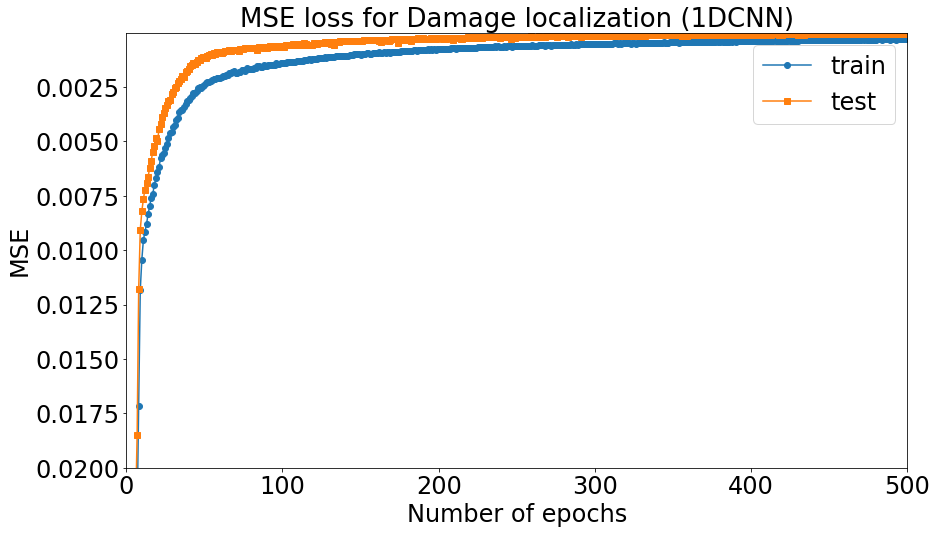

In [81]:
# call mseplot function
mseplot(history, 0.02, 1e-5, 24, 0, 500)
#mseplot(history, 4e-3, 1e-5, 22, 100, 500)

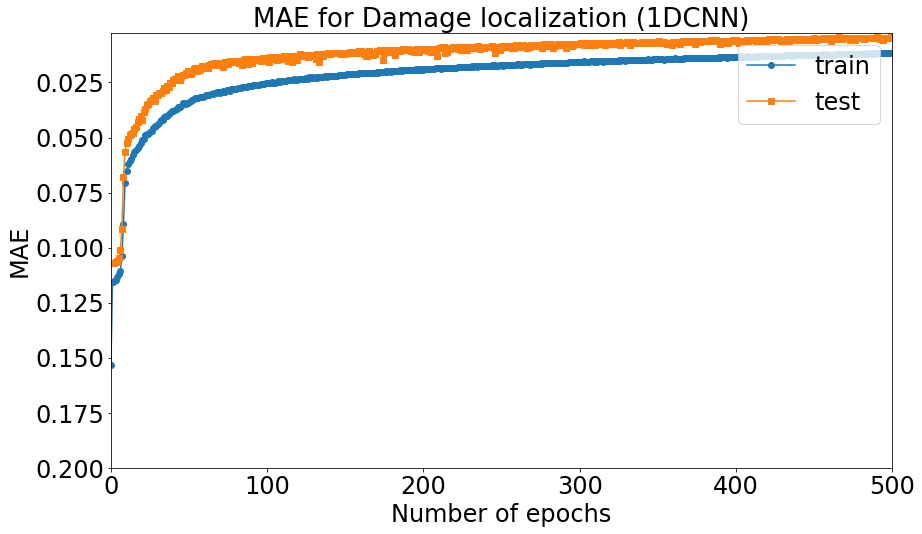

In [87]:
# call mae function
maeplot(history, 0.2, 0.0025, 24, 0, 500)

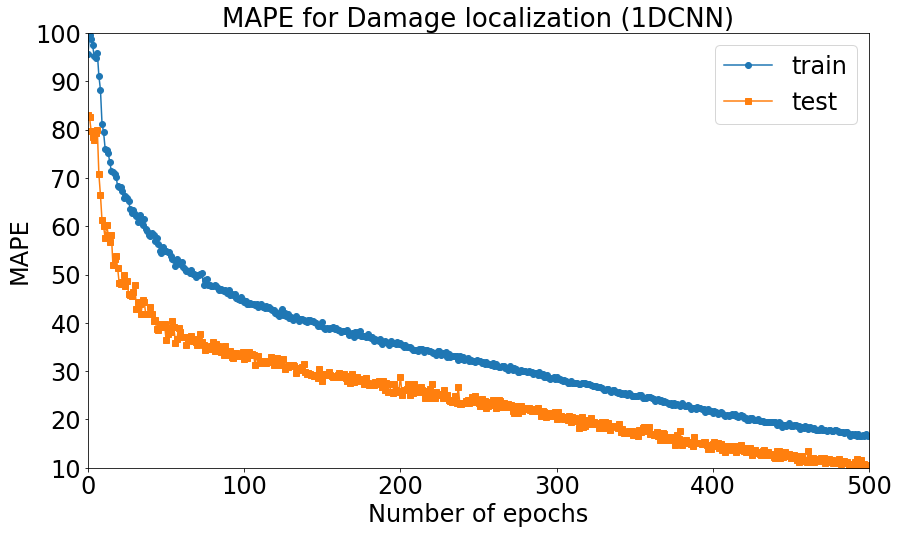

In [31]:
# call mape function
mapeplot(history, 10, 100, 24, 0, 500)

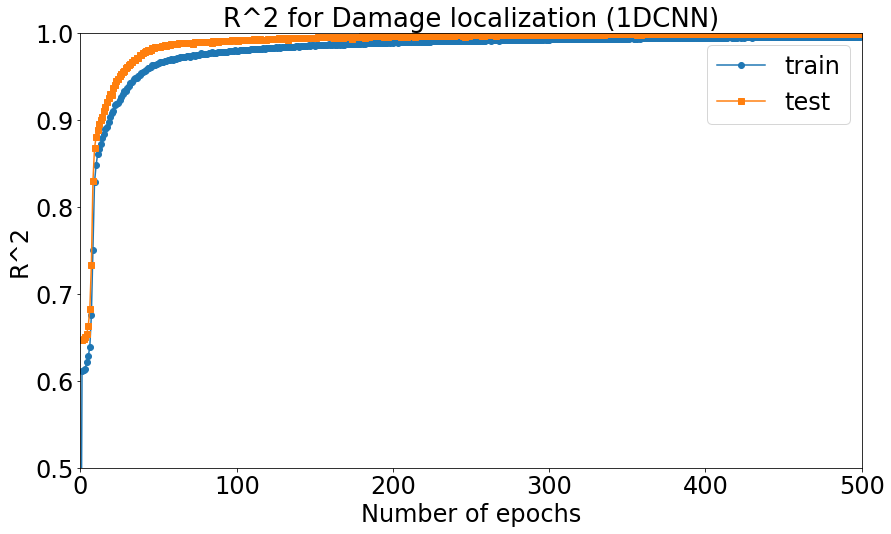

In [89]:
# call r2plot function
r2plot(history, 0.5, 1.0, 24, 0, 500)

In [33]:
# call pred function
pred(model,Xtest,ytest,'1DCNN_DamLocal.xlsx')

500/1 - 0s


,True values (x),True values (a),Predicted values (x),Predicted values (a),APD (x),APD (a)
0,0.482653,0.008878,0.489174,0.007242,1.35,18.42
1,0.758163,0.070918,0.761143,0.066880,0.39,5.69
2,0.620408,0.065102,0.615969,0.071412,0.72,9.69
3,0.773469,0.086429,0.789372,0.090922,2.06,5.20
4,0.712245,0.045714,0.716496,0.053850,0.60,17.80
...,...,...,...,...,...,...
495,0.145918,0.043776,0.152705,0.046254,4.65,5.66
496,0.773469,0.014694,0.788263,0.016490,1.91,12.22
497,0.100000,0.047653,0.099557,0.041930,0.44,12.01
498,0.773469,0.034082,0.774604,0.033537,0.15,1.60


# Generalization on frequencies

In [72]:
df_Df100_Ax = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/4_TestSet/0Dataset/Ax225_Df100_17Aug20.txt',header=None)
df_Df100_Flex = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/4_TestSet/0Dataset/Flex225_Df100_17Aug20.txt',header=None)

df_Df150_Ax = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/4_TestSet/0Dataset/Ax225_Df150_17Aug20.txt',header=None)
df_Df150_Flex = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/4_TestSet/0Dataset/Flex225_Df150_17Aug20.txt',header=None)

y100 = pd.read_excel('D:/SDE/1_SDEisotropicDL/CollectData/4_TestSet/f100/3Labels/labels100.xlsx',header=None)
y150 = pd.read_excel('D:/SDE/1_SDEisotropicDL/CollectData/4_TestSet/f150/3Labels/labels150.xlsx',header=None)

In [73]:
print(df_Df100_Ax.shape)
print(df_Df100_Flex.shape)
print(y100.shape)

print(df_Df150_Ax.shape)
print(df_Df150_Flex.shape)
print(y150.shape)

(225, 8192)
(225, 8192)
(225, 2)
(225, 8192)
(225, 8192)
(225, 2)


In [74]:
DAx100 = df_Df100_Ax.iloc[:, 0 : index]
DFlex100 = df_Df100_Flex.iloc[:, 0 : index]

DAx150 = df_Df150_Ax.iloc[:, 0 : index]
DFlex150 = df_Df150_Flex.iloc[:, 0 : index]

In [75]:
Xpred = DAx150  + DFlex150 # DAx150  + DFlex150 
Xpred = np.array(Xpred)
ypred = np.array(y150)/1000
print(Xpred.shape)
print(ypred.shape)

(225, 2000)
(225, 2)


In [76]:
ypred

array([[0.1       , 0.02      ],
       [0.1       , 0.02464286],
       [0.1       , 0.02928571],
       [0.1       , 0.03392857],
       [0.1       , 0.03857143],
       [0.1       , 0.04321429],
       [0.1       , 0.04785714],
       [0.1       , 0.0525    ],
       [0.1       , 0.05714286],
       [0.1       , 0.06178571],
       [0.1       , 0.06642857],
       [0.1       , 0.07107143],
       [0.1       , 0.07571429],
       [0.1       , 0.08035714],
       [0.1       , 0.085     ],
       [0.15357143, 0.02      ],
       [0.15357143, 0.02464286],
       [0.15357143, 0.02928571],
       [0.15357143, 0.03392857],
       [0.15357143, 0.03857143],
       [0.15357143, 0.04321429],
       [0.15357143, 0.04785714],
       [0.15357143, 0.0525    ],
       [0.15357143, 0.05714286],
       [0.15357143, 0.06178571],
       [0.15357143, 0.06642857],
       [0.15357143, 0.07107143],
       [0.15357143, 0.07571429],
       [0.15357143, 0.08035714],
       [0.15357143, 0.085     ],
       [0.

In [77]:
# call pred function
pred(model,Xpred,ypred,'1DCNN_DamLocal_pred150.xlsx')

225/1 - 0s


,True values (x),True values (a),Predicted values (x),Predicted values (a),APD (x),APD (a)
0,0.10,0.020000,0.204805,0.057965,104.81,189.82
1,0.10,0.024643,0.208057,0.056420,108.06,128.95
2,0.10,0.029286,0.199695,0.063354,99.69,116.33
3,0.10,0.033929,0.205538,0.065819,105.54,93.99
4,0.10,0.038571,0.197485,0.077335,97.48,100.50
...,...,...,...,...,...,...
220,0.85,0.066429,0.176130,0.039783,79.28,40.11
221,0.85,0.071071,0.175611,0.044276,79.34,37.70
222,0.85,0.075714,0.187269,0.045075,77.97,40.47
223,0.85,0.080357,0.199271,0.051797,76.56,35.54


# Generalization on noise 

In [69]:
#---Random gaussian noise parameter
beta4 = 0.042
r = sigma*np.random.randn(2000,1) + mu   #random parameter with gaussian distribution
r = np.transpose(r)

#---Noisy signal
n4 = beta4*r*np.max(X)
Xn4 = X + n4

n = random.sample(range(1, Xn4.shape[0]), 225)
Xn4 = Xn4[n,:] # Xn should be defined
yn4 = y[n]   # yn should be defined
    
#---Signal to noise ratio
import math

rms_Xn4 = np.sqrt(np.mean(Xn4**2))
Power_Xn4 = rms_Xn4**2

rms_n4 = np.sqrt(np.mean(n4**2))
Power_n4 = rms_n4**2

SNR_dB = 10*math.log10(Power_Xn4/Power_n4)
print("SNR : ",SNR_dB)

SNR :  8.285566807265615


18


Text(0.5, 1.0, 'Dam')

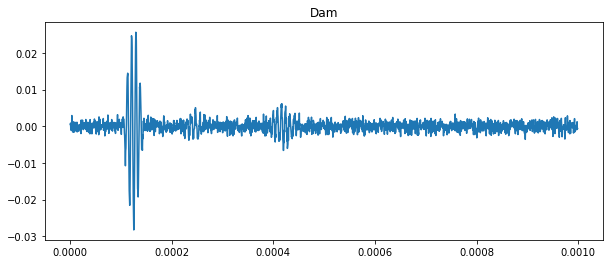

In [70]:
#---Plot non-noisy signal
Dp = random.randint(1, 225)
print(Dp)

plt.figure(figsize=(10,4))
plt.plot(time[0:index-1], Xn4[Dp, 0 : index-1])
plt.title('Dam')

In [71]:
# call pred function
pred(model,Xn4,yn4,'1DCNN_DamLocal_predNoise.xlsx')

225/1 - 0s


,True values (x),True values (a),Predicted values (x),Predicted values (a),APD (x),APD (a)
0,0.773469,0.024388,0.730674,0.037485,5.53,53.70
1,0.344898,0.028265,0.349903,0.022605,1.45,20.02
2,0.666327,0.039898,0.639570,0.039464,4.02,1.09
3,0.834694,0.014694,0.767022,0.021265,8.11,44.72
4,0.191837,0.088367,0.197046,0.049379,2.72,44.12
...,...,...,...,...,...,...
220,0.788776,0.094184,0.731519,0.083789,7.26,11.04
221,0.421429,0.008878,0.435520,0.004680,3.34,47.28
222,0.696939,0.016633,0.668303,0.018549,4.11,11.52
223,0.681633,0.010816,0.651083,0.016853,4.48,55.81
